___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.float_format', lambda x: "%.3f" % x)
np.set_printoptions(suppress=True)

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix
from tensorflow.keras.models import load_model

# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [2]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
print('No. of training images is', X_train.shape[0], 'with a resolution of ' , X_train.shape[1], 'x', X_train.shape[1])
print('No. of testing images is', X_test.shape[0], 'with a resolution of ' , X_test.shape[1], 'x', X_test.shape[1])
print('No. of classes is', len(np.unique(y_test)))

No. of training images is 60000 with a resolution of  28 x 28
No. of testing images is 10000 with a resolution of  28 x 28
No. of classes is 10


In [4]:
X_train[:1]

array([[[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           1,   0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,
           0,   1,   1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           3,   0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,
           4,   0,   0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           6,   0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,
           0,  12,  10

the images are in grayscale, where each image is represented as a 2-dimensional array of pixel values

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

In [5]:
classes = {0: 'T-shirt/top',
           1: 'Trouser',
           2: 'Pullover',
           3: 'Dress',
           4: 'Coat',
           5: 'Sandal',
           6: 'Shirt',
           7: 'Sneaker',
           8: 'Bag',
           9: 'Ankle boot'}

In [6]:
type(y_train)

numpy.ndarray

In [7]:
# mapping y to labels
y_test_classes = np.vectorize(classes.get)(y_test)
y_train_classes = np.vectorize(classes.get)(y_train)

In [8]:
y_train_classes[3]

'Dress'

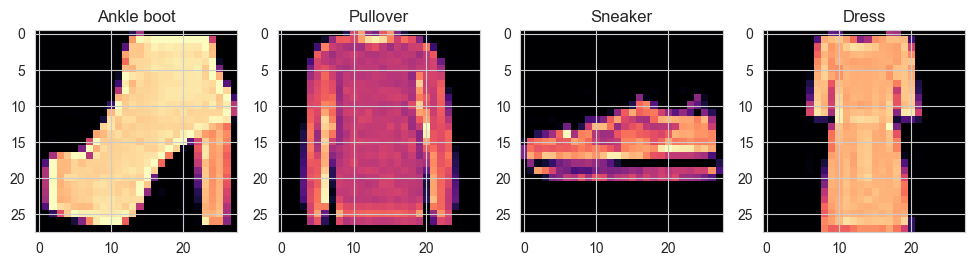

In [9]:
# display 4 picture based on index 
plt.figure(figsize=(12, 3))

for i in range(44, 48):
    plt.subplot(1, 4, i-43)
    plt.imshow(X_train[i], cmap='magma') # the colors are gray but I'm using colors for clear visuals
    plt.title(y_train_classes[i]) # to print class upove each figure

plt.show()

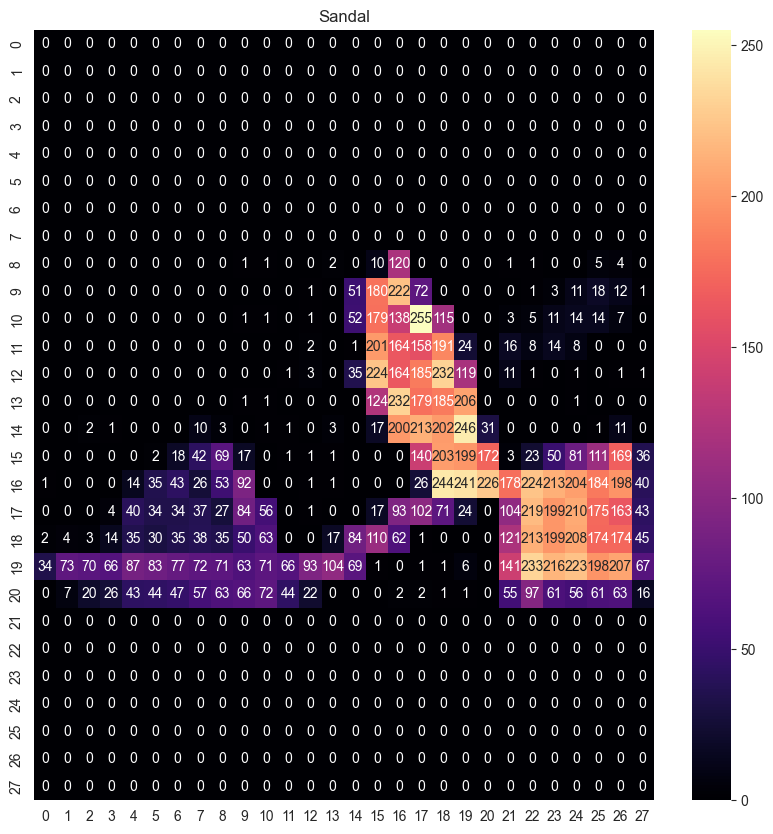

In [10]:
# displaying random pic in heatmap format 
plt.figure(figsize=(10, 10))
sns.heatmap(X_train[230],annot=True, cmap='magma', fmt='.3g')
plt.title(y_train_classes[230]);

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [11]:
X_train[300].max()

255

Why this step? to ensue that all values scaled within a consistent range before passing them to the model. <br>
Max normalization scales the pixel values to a range between 0 and 1, this normalization method ensures <br>
 that the maximum pixel value becomes 1, while all other pixel values are proportionally scaled down.

In [12]:
# Max normalization
X_train = X_train.astype('float32') # from int to float
X_test = X_test.astype('float32')
X_train = X_train / 255
X_test = X_test / 255

In [13]:
X_train[300].max()

1.0

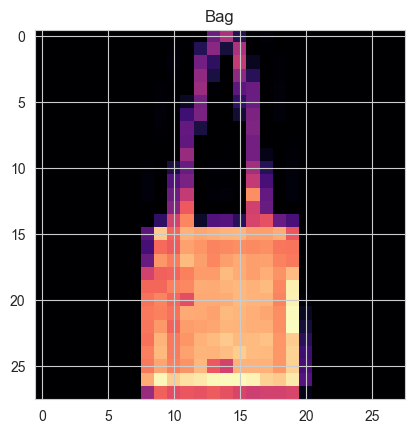

In [14]:
plt.imshow(X_train[200], cmap='magma')
plt.title(y_train_classes[200])
plt.show()

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [15]:
np.expand_dims(X_train, 3).shape

(60000, 28, 28, 1)

In [16]:
# reshaping X
X_train = np.expand_dims(X_train, 3)
X_test = np.expand_dims(X_test, 3)

In [17]:
X_test.shape

(10000, 28, 28, 1)

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [18]:
# we have 10 classes to be encoded
y_train_enc = to_categorical(y_train, 10)
y_test_enc = to_categorical(y_test, 10)

y_test_enc.shape

(10000, 10)

In [19]:
y_test_enc[2] # one-hot encoded

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

# Modeling

In [25]:
SEED = 101
import os
import random

def set_seed():
    os.environ["TF_DETERMINISTIC_OPS"] = "1"
    tf.keras.utils.set_random_seed(SEED)
    os.environ["PYTHONHASHSEED"] = str(SEED)
    random.seed(SEED)
    np.random.seed(SEED)
    tf.random.set_seed(SEED)

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

### Model 1 - suggested model

In [26]:
# suggested CNN arch
set_seed()

model_1 = Sequential()

model_1.add(Conv2D(filters=28, kernel_size=(3, 3),
    input_shape=(28, 28, 1), activation='relu'))

model_1.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_1.add(Flatten())

model_1.add(Dense(128, activation='relu'))

model_1.add(Dense(10, activation='softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

In [27]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 17500)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2240128   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [29]:
early_stop = EarlyStopping(
    monitor='val_accuracy', 
    mode='max', # maximize 
    patience=3, 
    restore_best_weights=True
)

In [30]:
model_1.fit(
    X_train,
    y_train_enc,
    batch_size = 64, # testing with 64
    epochs = 25,
    validation_data=(X_test, y_test_enc),# why did we use test here ??
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 36s 38ms/step - loss: 0.4122 - accuracy: 0.8551 - val_loss: 0.3400 - val_accuracy: 0.8742
Epoch 2/25
938/938 [==============================] - 36s 39ms/step - loss: 0.2620 - accuracy: 0.9036 - val_loss: 0.2792 - val_accuracy: 0.8996
Epoch 3/25
938/938 [==============================] - 36s 39ms/step - loss: 0.2185 - accuracy: 0.9214 - val_loss: 0.2782 - val_accuracy: 0.8997
Epoch 4/25
938/938 [==============================] - 35s 38ms/step - loss: 0.1870 - accuracy: 0.9306 - val_loss: 0.2565 - val_accuracy: 0.9075
Epoch 5/25
938/938 [==============================] - 35s 37ms/step - loss: 0.1618 - accuracy: 0.9401 - val_loss: 0.2690 - val_accuracy: 0.9072
Epoch 6/25
938/938 [==============================] - 36s 39ms/step - loss: 0.1408 - accuracy: 0.9480 - val_loss: 0.2542 - val_accuracy: 0.9138
Epoch 7/25
938/938 [==============================] - 38s 41ms/step - loss: 0.1232 - accuracy: 0.9549 - val_loss: 0.2707 - val_accuracy:

In [31]:
summary = pd.DataFrame(model_1.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.412,0.855,0.340,0.874
1,0.262,0.904,0.279,0.900
2,0.219,0.921,0.278,0.900
3,0.187,0.931,0.257,0.908
4,0.162,0.940,0.269,0.907


In [32]:
scores = pd.DataFrame(
    {'mean': summary.mean().values, 'std': summary.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.189,0.100
accuracy,0.931,0.035
val_loss,0.285,0.029
val_accuracy,0.903,0.012


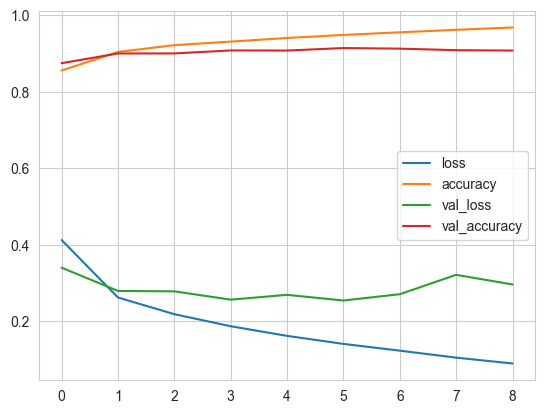

In [33]:
results = pd.DataFrame(model_1.history.history)
results.plot();

The model is slightly overfitting the data

### Model 2 - L1 reg

We are goning to test another arch and add L1 regularaization 

In [34]:
# alternative arch
set_seed()
model_2 = Sequential()

model_2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.01))) #L1 penalty

model_2.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_2.add(Flatten())

model_2.add(Dense(128, activation='relu'))

model_2.add(Dense(10, activation='softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [35]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 32)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 20000)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               2560128   
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2561738 (9.77 MB)
Trainable params: 2561738 (9.77 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [36]:
model_2.fit(
    X_train,
    y_train_enc,
    batch_size = 64, # testing with 64
    epochs = 25,
    validation_data=(X_test, y_test_enc),# why did we use test here ??
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 49s 52ms/step - loss: 0.4995 - accuracy: 0.8620 - val_loss: 0.4011 - val_accuracy: 0.8741
Epoch 2/25
938/938 [==============================] - 45s 48ms/step - loss: 0.3403 - accuracy: 0.8994 - val_loss: 0.3421 - val_accuracy: 0.8929
Epoch 3/25
938/938 [==============================] - 46s 50ms/step - loss: 0.2970 - accuracy: 0.9112 - val_loss: 0.3232 - val_accuracy: 0.8957
Epoch 4/25
938/938 [==============================] - 40s 43ms/step - loss: 0.2675 - accuracy: 0.9191 - val_loss: 0.3094 - val_accuracy: 0.9051
Epoch 5/25
938/938 [==============================] - 46s 49ms/step - loss: 0.2450 - accuracy: 0.9268 - val_loss: 0.2981 - val_accuracy: 0.9080
Epoch 6/25
938/938 [==============================] - 44s 47ms/step - loss: 0.2259 - accuracy: 0.9338 - val_loss: 0.3030 - val_accuracy: 0.9073
Epoch 7/25
938/938 [==============================] - 42s 45ms/step - loss: 0.2102 - accuracy: 0.9387 - val_loss: 0.3221 - val_accuracy:

In [37]:
summary2 = pd.DataFrame(model_2.history.history)
summary2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.500,0.862,0.401,0.874
1,0.340,0.899,0.342,0.893
2,0.297,0.911,0.323,0.896
3,0.268,0.919,0.309,0.905
4,0.245,0.927,0.298,0.908


In [38]:
scores = pd.DataFrame(
    {'mean': summary2.mean().values, 'std': summary2.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.223,0.099
accuracy,0.938,0.030
val_loss,0.318,0.027
val_accuracy,0.906,0.011


Slightly better results with L1

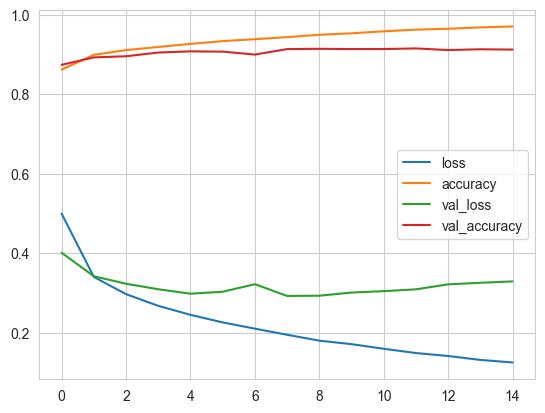

In [39]:
results2 = pd.DataFrame(model_2.history.history)
results2.plot();

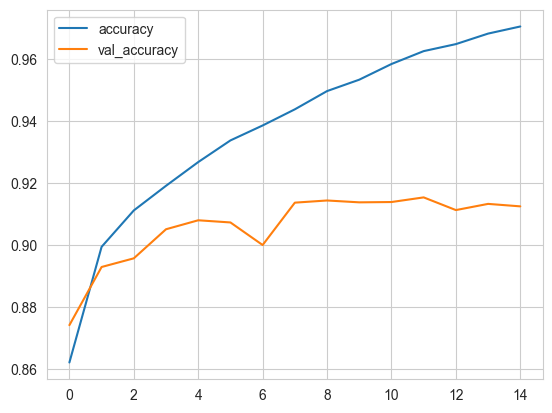

In [40]:
summary2[['accuracy', 'val_accuracy']].plot();

The accuracy doesn't improve

### Model 3 - L2 reg

In [41]:
# suggested CNN arch with L2 regularazation 
set_seed()
model_3 = Sequential()

model_3.add(Conv2D(filters=28, kernel_size=(3, 3),kernel_regularizer=tf.keras.regularizers.l2(0.05),
    input_shape=(28, 28, 1), activation='relu'))

model_3.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_3.add(Flatten())

model_3.add(Dense(128, activation='relu'))

model_3.add(Dense(10, activation='softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy'])

In [42]:
model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 25, 25, 28)        0         
 g2D)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 17500)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2240128   
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2241698 (8.55 MB)
Trainable params: 2241698 (8.55 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [43]:
model_3.fit(
    X_train,
    y_train_enc,
    batch_size = 64, 
    epochs = 25,
    validation_data=(X_test, y_test_enc),# why did we use test here ??
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 32s 34ms/step - loss: 0.4829 - accuracy: 0.8507 - val_loss: 0.3906 - val_accuracy: 0.8704
Epoch 2/25
938/938 [==============================] - 32s 34ms/step - loss: 0.3202 - accuracy: 0.8943 - val_loss: 0.3254 - val_accuracy: 0.8915
Epoch 3/25
938/938 [==============================] - 33s 35ms/step - loss: 0.2789 - accuracy: 0.9073 - val_loss: 0.3179 - val_accuracy: 0.8917
Epoch 4/25
938/938 [==============================] - 33s 36ms/step - loss: 0.2529 - accuracy: 0.9151 - val_loss: 0.2986 - val_accuracy: 0.8985
Epoch 5/25
938/938 [==============================] - 35s 37ms/step - loss: 0.2331 - accuracy: 0.9212 - val_loss: 0.2945 - val_accuracy: 0.9016
Epoch 6/25
938/938 [==============================] - 36s 38ms/step - loss: 0.2155 - accuracy: 0.9281 - val_loss: 0.2783 - val_accuracy: 0.9056
Epoch 7/25
938/938 [==============================] - 37s 39ms/step - loss: 0.2034 - accuracy: 0.9315 - val_loss: 0.2712 - val_accuracy:

In [44]:
summary3 = pd.DataFrame(model_3.history.history)
summary3.head()

,loss,accuracy,val_loss,val_accuracy
0,0.483,0.851,0.391,0.870
1,0.320,0.894,0.325,0.891
2,0.279,0.907,0.318,0.892
3,0.253,0.915,0.299,0.899
4,0.233,0.921,0.295,0.902


In [45]:
scores = pd.DataFrame(
    {'mean': summary3.mean().values, 'std': summary3.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.228,0.094
accuracy,0.926,0.029
val_loss,0.298,0.032
val_accuracy,0.902,0.012


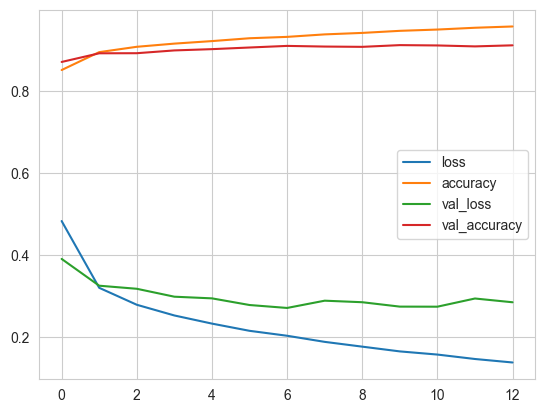

In [46]:
results3 = pd.DataFrame(model_3.history.history)
results3.plot();

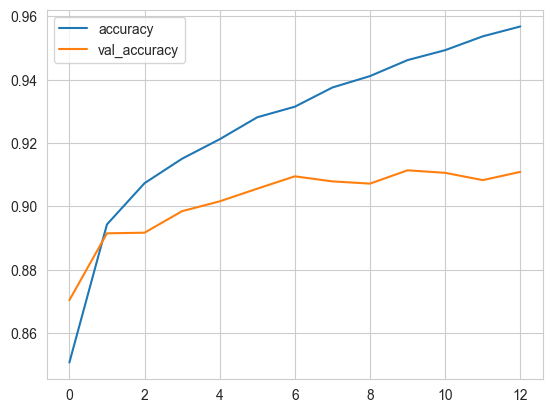

In [47]:
summary3[['accuracy', 'val_accuracy']].plot();

Slightly better than model 2

### Model 4 - L1 (0.03) with droupouts

In [48]:
# alternative arch 2
set_seed()
model_4 = Sequential()

# 64 filters
model_4.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.03)))

model_4.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_4.add(Flatten())

model_4.add(Dense(128, activation='relu'))
model_4.add(Dropout(0.5))  # adding droup out 
model_4.add(Dense(32, activation='relu')) # adding layer
model_4.add(Dropout(0.2))  # adding droup out 
model_4.add(Dense(10, activation='softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [49]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 25, 25, 64)        0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 40000)             0         
                                                                 
 dense_8 (Dense)             (None, 128)               5120128   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 32)                4128      
                                                      

In [50]:
model_4.fit(
    X_train,
    y_train_enc,
    batch_size = 64, 
    epochs = 25,
    validation_data=(X_test, y_test_enc),
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 84s 89ms/step - loss: 0.8857 - accuracy: 0.7479 - val_loss: 0.5205 - val_accuracy: 0.8488
Epoch 2/25
938/938 [==============================] - 76s 81ms/step - loss: 0.5460 - accuracy: 0.8379 - val_loss: 0.4164 - val_accuracy: 0.8754
Epoch 3/25
938/938 [==============================] - 77s 82ms/step - loss: 0.4708 - accuracy: 0.8590 - val_loss: 0.3862 - val_accuracy: 0.8818
Epoch 4/25
938/938 [==============================] - 81s 86ms/step - loss: 0.4372 - accuracy: 0.8686 - val_loss: 0.3732 - val_accuracy: 0.8817
Epoch 5/25
938/938 [==============================] - 74s 79ms/step - loss: 0.4078 - accuracy: 0.8771 - val_loss: 0.3563 - val_accuracy: 0.8903
Epoch 6/25
938/938 [==============================] - 80s 86ms/step - loss: 0.3933 - accuracy: 0.8782 - val_loss: 0.3466 - val_accuracy: 0.8899
Epoch 7/25
938/938 [==============================] - 80s 85ms/step - loss: 0.3761 - accuracy: 0.8846 - val_loss: 0.3403 - val_accuracy:

In [51]:
summary4 = pd.DataFrame(model_4.history.history)
summary4.head()

,loss,accuracy,val_loss,val_accuracy
0,0.886,0.748,0.520,0.849
1,0.546,0.838,0.416,0.875
2,0.471,0.859,0.386,0.882
3,0.437,0.869,0.373,0.882
4,0.408,0.877,0.356,0.890


In [52]:
scores = pd.DataFrame(
    {'mean': summary4.mean().values, 'std': summary4.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.410,0.141
accuracy,0.875,0.038
val_loss,0.358,0.050
val_accuracy,0.889,0.012


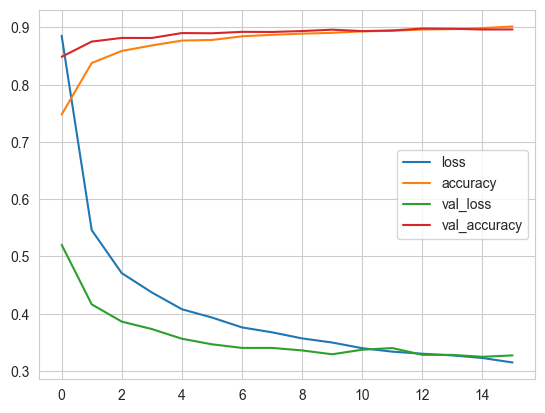

In [53]:
results4 = pd.DataFrame(model_4.history.history)
results4.plot();

The scores are more consistient

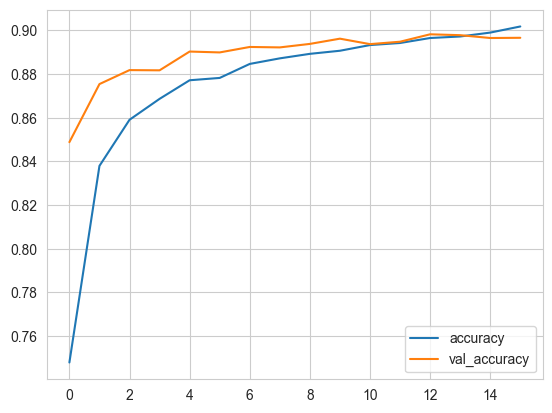

In [54]:
summary4[['accuracy', 'val_accuracy']].plot();

The val_accuracy is higher than train accuracy

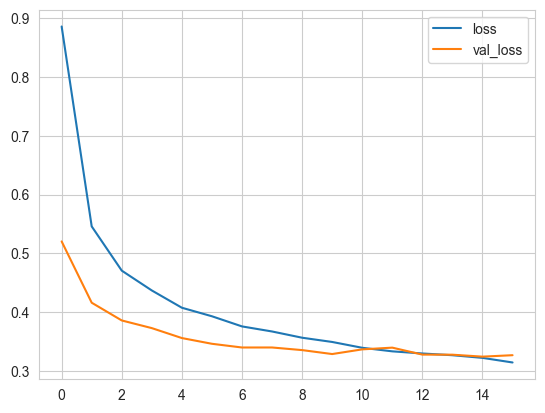

In [55]:
summary4[['loss', 'val_loss']].plot();

### Model 5 - L1 (0.02) with more layers and dropouts

In [56]:
# hopefully it's the last model -_-
set_seed()
model_5 = Sequential()

# 32 filters
model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', 
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.02)))

model_5.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_5.add(Flatten())

model_5.add(Dense(128, activation='relu'))
model_5.add(Dropout(0.4))  # adding droup out 
model_5.add(Dense(32, activation='relu')) # adding layer
model_5.add(Dropout(0.2))  # adding droup out 
model_5.add(Dense(10, activation='softmax'))

model_5.compile(loss='categorical_crossentropy',
              optimizer='rmsprop', metrics=['accuracy']) # opt rmsprop

In [57]:
model_5.fit(
    X_train,
    y_train_enc,
    batch_size = 64, 
    epochs = 25,
    validation_data=(X_test, y_test_enc),
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 38s 40ms/step - loss: 0.8050 - accuracy: 0.7700 - val_loss: 0.4997 - val_accuracy: 0.8465
Epoch 2/25
938/938 [==============================] - 42s 45ms/step - loss: 0.4997 - accuracy: 0.8512 - val_loss: 0.4319 - val_accuracy: 0.8647
Epoch 3/25
938/938 [==============================] - 41s 44ms/step - loss: 0.4342 - accuracy: 0.8667 - val_loss: 0.3699 - val_accuracy: 0.8853
Epoch 4/25
938/938 [==============================] - 40s 43ms/step - loss: 0.3996 - accuracy: 0.8773 - val_loss: 0.3767 - val_accuracy: 0.8783
Epoch 5/25
938/938 [==============================] - 40s 42ms/step - loss: 0.3728 - accuracy: 0.8841 - val_loss: 0.3422 - val_accuracy: 0.8912
Epoch 6/25
938/938 [==============================] - 40s 42ms/step - loss: 0.3641 - accuracy: 0.8862 - val_loss: 0.3614 - val_accuracy: 0.8811
Epoch 7/25
938/938 [==============================] - 40s 42ms/step - loss: 0.3497 - accuracy: 0.8911 - val_loss: 0.3469 - val_accuracy:

In [58]:
summary5 = pd.DataFrame(model_5.history.history)
summary5.head()

,loss,accuracy,val_loss,val_accuracy
0,0.805,0.770,0.500,0.846
1,0.500,0.851,0.432,0.865
2,0.434,0.867,0.370,0.885
3,0.400,0.877,0.377,0.878
4,0.373,0.884,0.342,0.891


In [59]:
scores = pd.DataFrame(
    {'mean': summary5.mean().values, 'std': summary5.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.446,0.154
accuracy,0.865,0.041
val_loss,0.388,0.053
val_accuracy,0.876,0.015


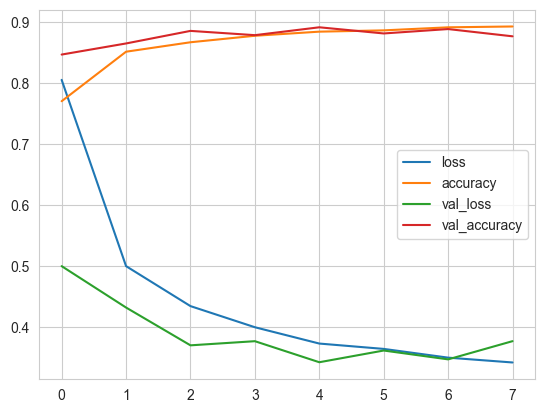

In [60]:
results5 = pd.DataFrame(model_5.history.history)
results5.plot();

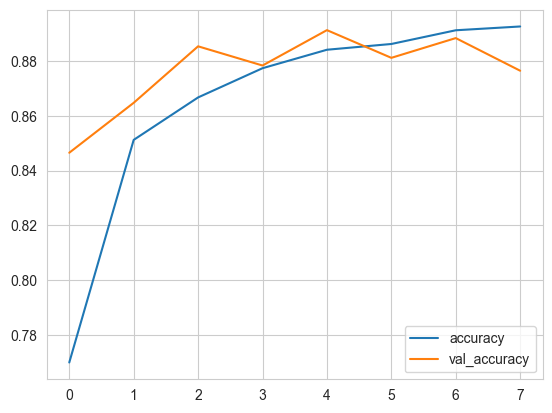

In [61]:
summary5[['accuracy', 'val_accuracy']].plot();

### Model 6 - L1 (0.03) with droupouts and alt arch

In [63]:
# very last model :)
set_seed()
model_6 = Sequential()

# 64 filters
model_6.add(Conv2D(64, kernel_size=(3, 3), activation='relu', 
input_shape=(28, 28, 1), kernel_regularizer=tf.keras.regularizers.l1(0.03)))

model_6.add(MaxPool2D(pool_size=(2, 2), strides=(1, 1)))

model_6.add(Flatten())

model_6.add(Dense(128, activation='relu'))
model_6.add(Dropout(0.4))  # adding droup out 
model_6.add(Dense(64, activation='relu')) # adding layer
model_6.add(Dropout(0.2))  # adding droup out 
model_6.add(Dense(10, activation='softmax'))

model_6.compile(loss='categorical_crossentropy',
              optimizer='adam', metrics=['accuracy']) # opt is Adam

In [64]:
model_6.fit(
    X_train,
    y_train_enc,
    batch_size = 64, 
    epochs = 25,
    validation_data=(X_test, y_test_enc),
    callbacks=[early_stop],
)

Epoch 1/25
938/938 [==============================] - 68s 72ms/step - loss: 0.7846 - accuracy: 0.7836 - val_loss: 0.4596 - val_accuracy: 0.8623
Epoch 2/25
938/938 [==============================] - 69s 73ms/step - loss: 0.4735 - accuracy: 0.8585 - val_loss: 0.4011 - val_accuracy: 0.8771
Epoch 3/25
938/938 [==============================] - 73s 78ms/step - loss: 0.4159 - accuracy: 0.8733 - val_loss: 0.3610 - val_accuracy: 0.8891
Epoch 4/25
938/938 [==============================] - 78s 83ms/step - loss: 0.3828 - accuracy: 0.8817 - val_loss: 0.3424 - val_accuracy: 0.8933
Epoch 5/25
938/938 [==============================] - 78s 83ms/step - loss: 0.3596 - accuracy: 0.8896 - val_loss: 0.3291 - val_accuracy: 0.8948
Epoch 6/25
938/938 [==============================] - 75s 80ms/step - loss: 0.3393 - accuracy: 0.8939 - val_loss: 0.3230 - val_accuracy: 0.8936
Epoch 7/25
938/938 [==============================] - 76s 81ms/step - loss: 0.3244 - accuracy: 0.8978 - val_loss: 0.3338 - val_accuracy:

In [65]:
summary6 = pd.DataFrame(model_6.history.history)
summary6.head()

,loss,accuracy,val_loss,val_accuracy
0,0.785,0.784,0.460,0.862
1,0.474,0.859,0.401,0.877
2,0.416,0.873,0.361,0.889
3,0.383,0.882,0.342,0.893
4,0.360,0.890,0.329,0.895


In [66]:
scores = pd.DataFrame(
    {'mean': summary6.mean().values, 'std': summary6.std().values},
    index=['loss', 'accuracy', 'val_loss', 'val_accuracy'],
)
scores

,mean,std
loss,0.373,0.136
accuracy,0.885,0.034
val_loss,0.342,0.044
val_accuracy,0.892,0.011


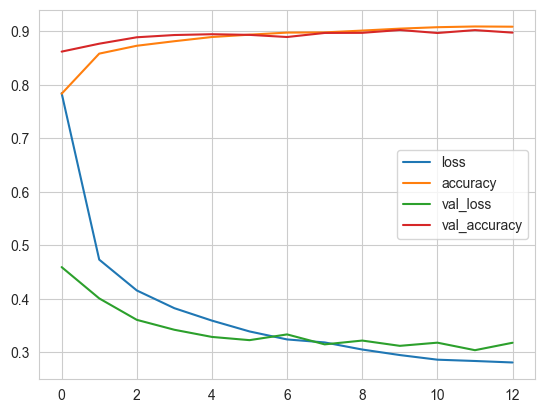

In [67]:
results6 = pd.DataFrame(model_6.history.history)
results6.plot();

## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

### Models comparison

In [68]:
m1 = summary.mean().values
m2 = summary2.mean().values
m3 = summary3.mean().values
m4 = summary4.mean().values
m5 = summary5.mean().values
m6 = summary6.mean().values

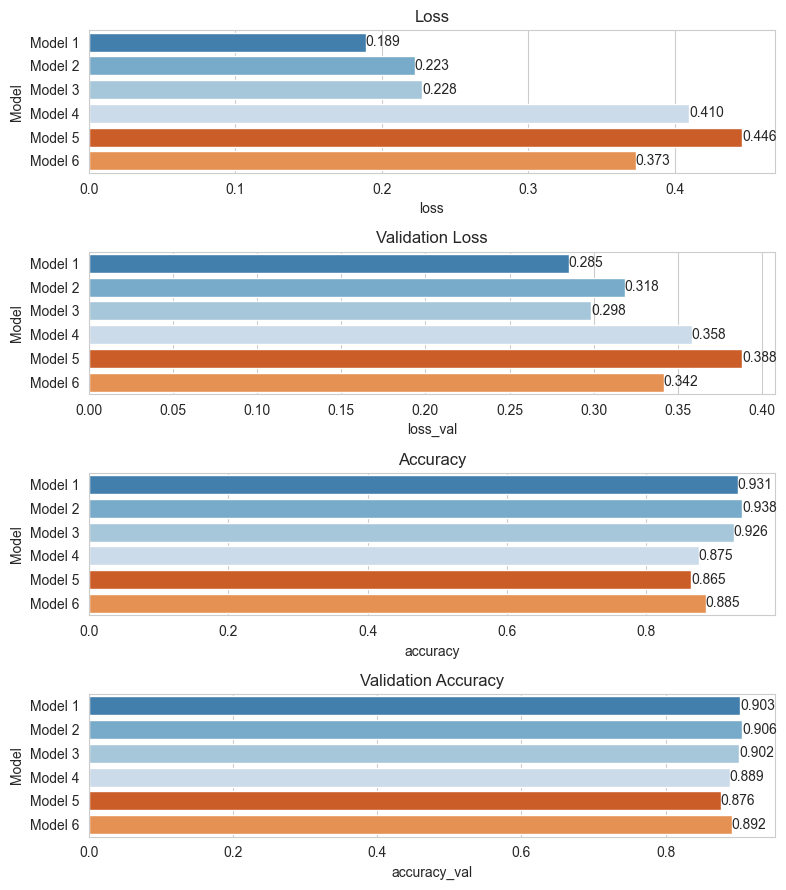

In [69]:
compare = pd.DataFrame(
    {
        'Model': ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
        'loss': [m1[0], m2[0],m3[0],m4[0], m5[0],m6[0]],
        'loss_val': [m1[2], m2[2],m3[2],m4[2],m5[2],m6[2]],
        'accuracy': [m1[1], m2[1],m3[1],m4[1],m5[1],m6[1]],
        'accuracy_val': [m1[3], m2[3],m3[3],m4[3],m5[3],m6[3]],

    }
)


plt.figure(figsize=(8, 9))
plt.subplot(411)
ax = sns.barplot(x='loss', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Loss')

plt.subplot(412)
ax = sns.barplot(x='loss_val', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Validation Loss')

plt.subplot(413)
ax = sns.barplot(x='accuracy', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Accuracy')

plt.subplot(414)
ax = sns.barplot(x='accuracy_val', y='Model', data=compare, palette='tab20c')
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.title('Validation Accuracy')
plt.tight_layout()
plt.show();

In [82]:
acc_scores = pd.DataFrame(
    {'Model 1': model_1.evaluate(X_test, y_test_enc, verbose=0), 
     'Model 2': model_2.evaluate(X_test, y_test_enc, verbose=0),
     'Model 3': model_3.evaluate(X_test, y_test_enc, verbose=0),
     'Model 4': model_4.evaluate(X_test, y_test_enc, verbose=0),
     'Model 5': model_5.evaluate(X_test, y_test_enc, verbose=0),
     'Model 6': model_6.evaluate(X_test, y_test_enc, verbose=0)},
     index=['test loss', 'test accuracy'],
)
acc_scores

,Model 1,Model 2,Model 3,Model 4,Model 5,Model 6
test loss,0.254,0.309,0.274,0.328,0.342,0.312
test accuracy,0.914,0.915,0.911,0.898,0.891,0.903


Model 2 has the best results but we need further examination for the classes performance

In [133]:
y_pred = model_2.predict(X_test, verbose=0)

In [134]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [135]:
print(classification_report(y_test, y_pred,zero_division=False))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       1.00      0.97      0.98      1000
           2       0.87      0.87      0.87      1000
           3       0.91      0.91      0.91      1000
           4       0.83      0.89      0.86      1000
           5       0.99      0.98      0.98      1000
           6       0.79      0.75      0.77      1000
           7       0.95      0.99      0.97      1000
           8       0.98      0.97      0.98      1000
           9       0.98      0.95      0.97      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [136]:
conv_mat = confusion_matrix(y_test, y_pred)

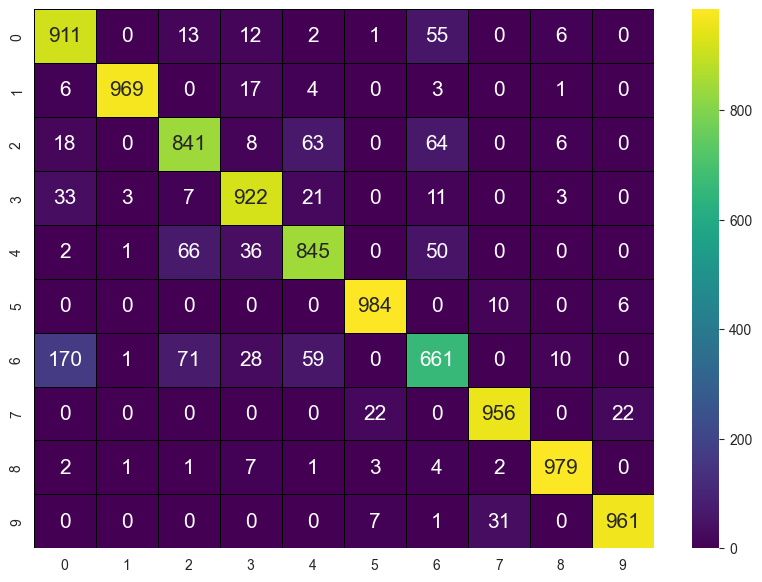

In [138]:
plt.figure(figsize=(10, 7))
sns.heatmap(
    conv_mat,
    annot=True,
    cmap='viridis',
    linewidths=0.5,
    linecolor='black',
    fmt='g',
    annot_kws={"size": 15},
)
plt.show()

In [142]:
np.not_equal(y_test, y_pred).sum()

899

In [143]:
np.equal(y_test, y_pred).sum()

9101

The model has misclassified around 10% of the testing set 

## Prediction

### Saving the model

In [191]:
model_2.save('classify-clothes.keras')

In [15]:
model = load_model('classify-clothes.keras')

In [16]:
item = X_test[14]
item.shape

(28, 28)

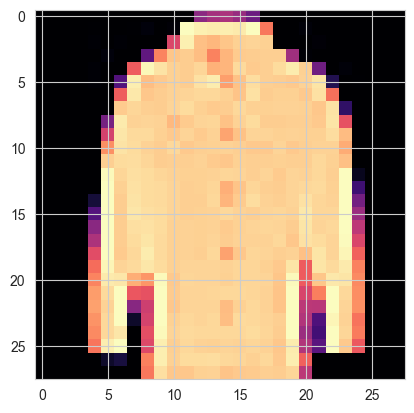

In [17]:
plt.imshow(item, cmap='magma')
plt.show()

In [18]:
pred_prob = model.predict(np.expand_dims(item, 0))
pred_prob

1/1 [==============================] - 0s 129ms/step


array([[0.0000176 , 0.00000191, 0.3292521 , 0.00000154, 0.6701859 ,
        0.00000012, 0.00052158, 0.        , 0.00000172, 0.00001752]],
      dtype=float32)

In [19]:
y_pred = np.argmax(pred_prob)

In [21]:
print('the model predicted that item belongs to class' , y_pred)
print(classes[y_pred])

the model predicted that item belongs to class 4
Coat


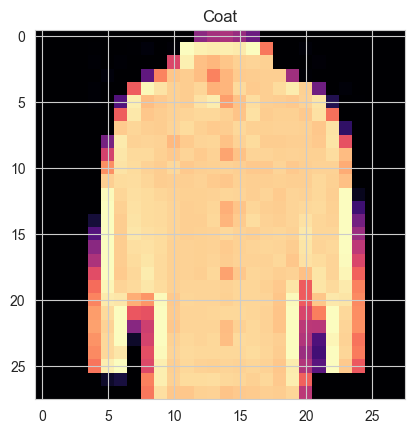

In [22]:
plt.imshow(item, cmap='magma')
plt.title(y_test_classes[14])
plt.show()

Correct prediction!

In [23]:
pred_prob = model.predict(np.expand_dims(X_test[880], 0))

1/1 [==============================] - 0s 28ms/step


In [24]:
y_pred = np.argmax(pred_prob)
print('the model predicted that item belongs to class' , y_pred)
print(classes[y_pred])

the model predicted that item belongs to class 7
Sneaker


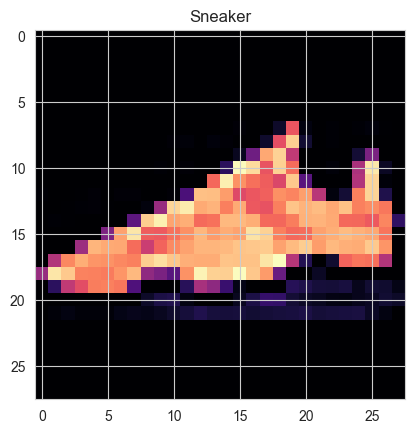

In [25]:
plt.imshow(X_test[880], cmap='magma')
plt.title(y_test_classes[880])
plt.show()

Another correct prediction, i could do this all day :)

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___